In [1]:
# Import required modules
from importlib import reload
import kika.endf.classes.mf4.plotting
reload(kika.endf.classes.mf4.plotting)

from kika.endf.read_endf import read_endf
from kika.utils import configure_endf_debug_logging
from kika.endf.classes.mf4.plotting import plot_angular_distribution, plot_legendre_coefficients_from_endf, plot_legendre_coefficient_comparison
import logging

# === DEBUG LOGGING SETUP ===
modules = [
    'kika.endf.parsers.parse_mf4',
    ]
configure_endf_debug_logging(enable=True, level=logging.DEBUG, modules=modules)

<RootLogger root (WARNING)>

In [2]:
# Define file path
jeff_Fe56 = '/soft_snc/lib/endf/jeff40/neutrons/13-Al-26g.txt'
endf = read_endf(jeff_Fe56)

mf4mt2 = endf.mf[4].mt[2]

[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 with 3401 lines
[DEBUG] kika.endf.parsers.parse_mf4: Found MT sections: [2, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT2 with 654 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT2 with 654 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT2 header: ZA=13026, AWR=25.76365, LTT=3
[DEBUG] kika.endf.parsers.parse_mf4: MT2 using mixed format (LTT=3)
[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT2
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT51 with 120 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT51 with 120 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT51 header: ZA=13026, AWR=25.76365, LTT=1
[DEBUG] kika.endf.parsers.parse_mf4: MT51 using Legendre expansion format (LTT=1)
[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT51
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT52 with 113 lines


/home/MONLEON-JUAN/KIKA/kika/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 10, 12, 14, 32, 33, 40]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


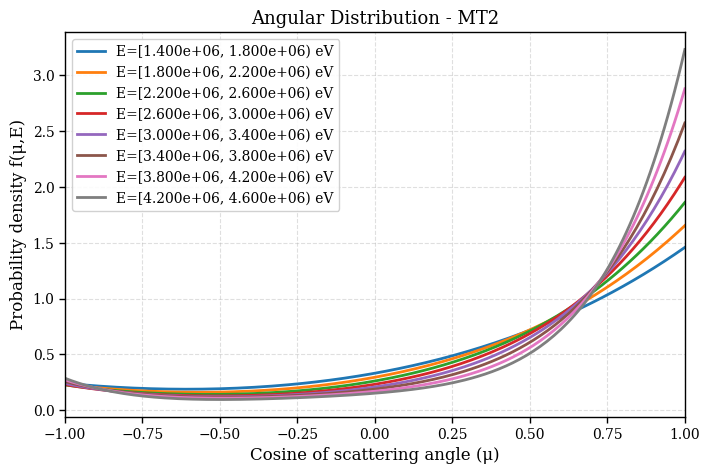

In [3]:
plot_angular_distribution(mf4mt2, energy_indices=(8,15), data_type='legendre', style='default')

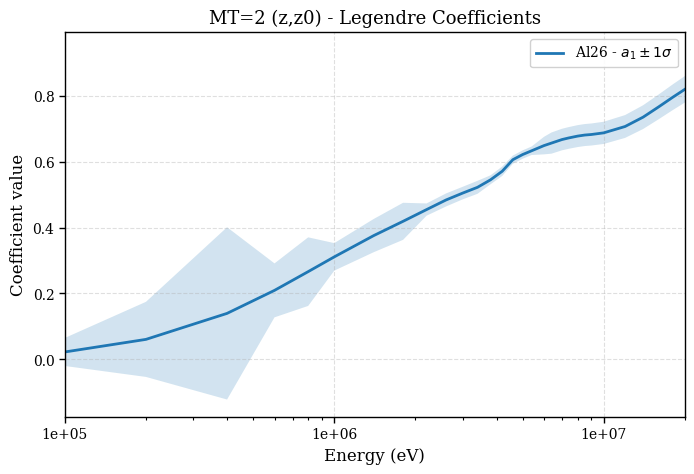

In [4]:
fig = plot_legendre_coefficients_from_endf(
    endf, 
    mt=2, 
    orders=[1], 
    style='default',
    include_uncertainties=True,
    uncertainty_sigma=1,
    energy_range=(1e5, 2e7),
)

In [5]:
from kika.endf.classes.mf4.plotting import plot_legendre_coefficient_uncertainties_from_endf

=== Testing New Uncertainty Plotting Function ===


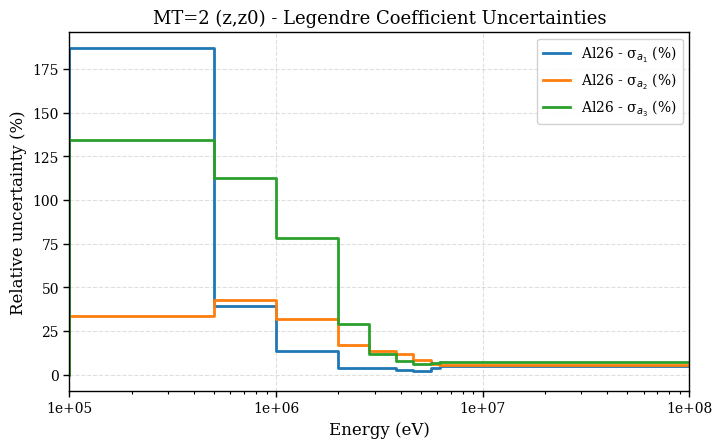

In [6]:
# Test the new uncertainty plotting function
print("=== Testing New Uncertainty Plotting Function ===")


# Test with relative uncertainties (default)
fig_rel = plot_legendre_coefficient_uncertainties_from_endf(
    endf, 
    mt=2, 
    orders=[1,2,3], 
    uncertainty_type='relative',
    figsize=(12, 7),
    energy_range=(1e5, 1e8)
)
    

In [7]:
jendl_Fe56 = '/share_snc/snc/JuanMonleon/n-26056_jendl.txt'
jendl_endf = read_endf(jendl_Fe56)

[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 with 5020 lines
[DEBUG] kika.endf.parsers.parse_mf4: Found MT sections: [2]
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MT2 with 5020 lines
[DEBUG] kika.endf.parsers.parse_mf4: Parsing MF4 MT2 with 5020 lines
[DEBUG] kika.endf.parsers.parse_mf4: MT2 header: ZA=26056, AWR=55.454429999999995, LTT=3
[DEBUG] kika.endf.parsers.parse_mf4: MT2 using mixed format (LTT=3)


/home/MONLEON-JUAN/KIKA/kika/endf/parsers/parse_endf.py:90: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 8, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


[DEBUG] kika.endf.parsers.parse_mf4: Successfully parsed MT2
[DEBUG] kika.endf.parsers.parse_mf4: Finished parsing MF4


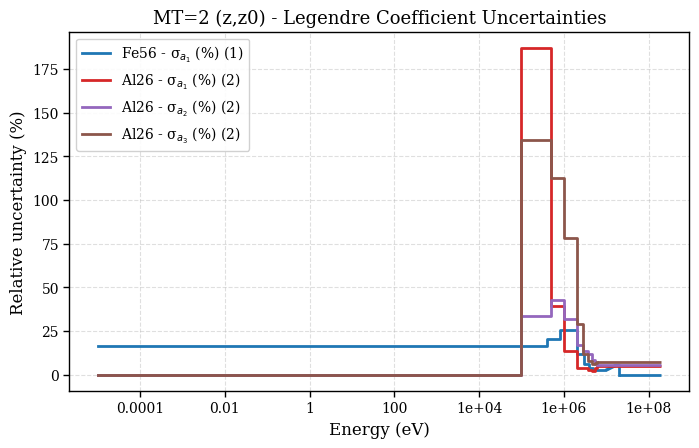

In [8]:
fig_rel = plot_legendre_coefficient_uncertainties_from_endf(
    [jendl_endf, endf], 
    mt=2, 
    orders=[1,2,3], 
    uncertainty_type='relative',
    figsize=(12, 7)
)

Uncertainty legend should show:
Fe56 - σₐ₁ (%) (JENDL)
Fe56 - σₐ₁ (%) (JEFF-3.3)


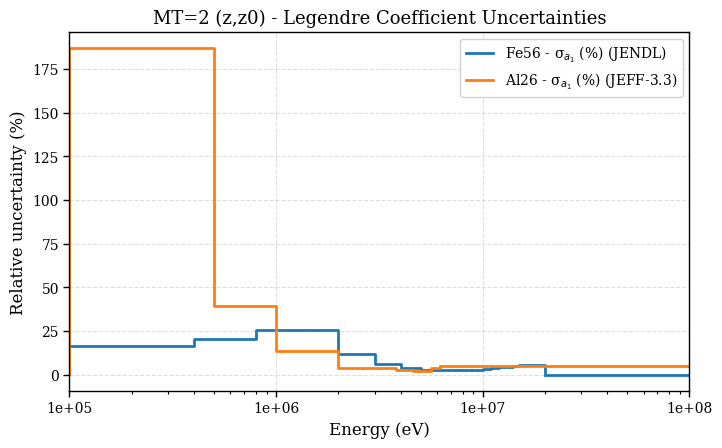

In [9]:
# Test uncertainty plotting with updated legend format
from kika.endf.classes.mf4.plotting import plot_legendre_coefficient_uncertainties_from_endf

fig_unc = plot_legendre_coefficient_uncertainties_from_endf(
    [jendl_endf, endf], 
    mt=2, 
    orders=[1], 
    uncertainty_type='relative',
    labels=['JENDL', 'JEFF-3.3'],
    figsize=(12, 7),
    energy_range=(1e5, 1e8)
)

print("Uncertainty legend should show:")
print("Fe56 - σₐ₁ (%) (JENDL)")  
print("Fe56 - σₐ₁ (%) (JEFF-3.3)")

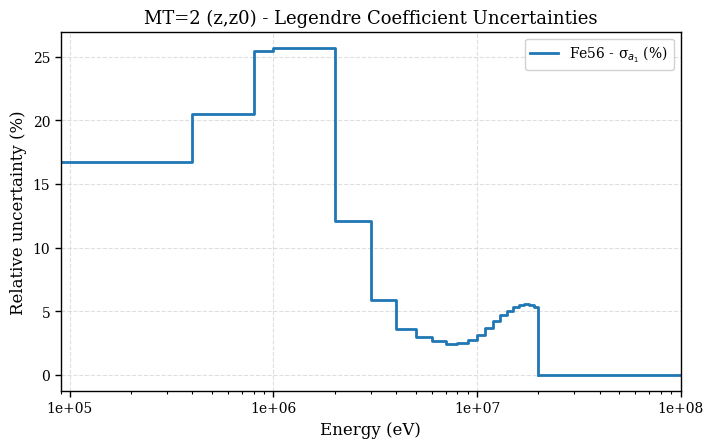

In [10]:
fig_unc = plot_legendre_coefficient_uncertainties_from_endf(
    [jendl_endf], 
    mt=2, 
    orders=[1], 
    uncertainty_type='relative',
    figsize=(12, 7),
    energy_range=(9e4, 1e8)
)

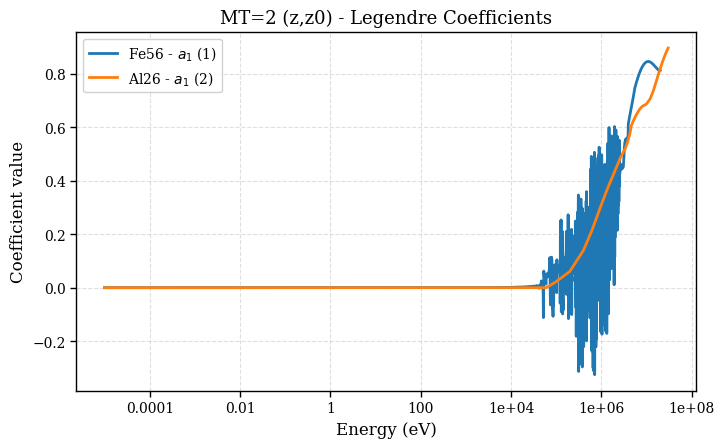

In [11]:
fig_rel = plot_legendre_coefficients_from_endf(
    [jendl_endf, endf], 
    mt=2, 
    orders=[1], 
    #labels=['JENDL', 'JEFF-3.3'],
    figsize=(12, 7)
)

Testing plot_mf34_uncertainties with energy_range parameter:
Energy range: (9e4, 1e8)
The plot should extend to 1e8 even if data ends earlier


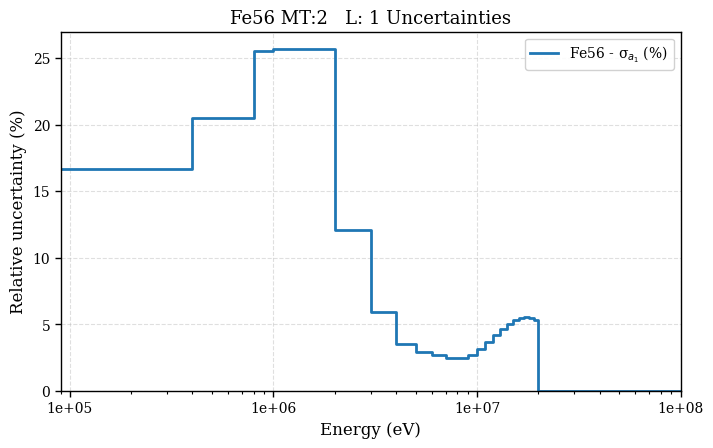

In [12]:
# Test energy_range parameter with plot_mf34_uncertainties
# First convert ENDF to MF34CovMat format
mf34_mt = jendl_endf.mf[34].mt[2]
mf34_covmat = mf34_mt.to_ang_covmat()

# Get isotope ID from JENDL data
isotope_id = int(jendl_endf.mf[4].mt[2].zaid) if hasattr(jendl_endf.mf[4].mt[2], 'zaid') else 26056

# Test with energy range
fig_mf34 = mf34_covmat.plot_uncertainties(
    isotope=isotope_id,
    mt=2,
    legendre_coeffs=[1],
    uncertainty_type='relative',
    figsize=(12, 7),
    energy_range=(9e4, 1e8)  # Same range as the ENDF plotting function
)

print("Testing plot_mf34_uncertainties with energy_range parameter:")
print(f"Energy range: (9e4, 1e8)")
print("The plot should extend to 1e8 even if data ends earlier")

In [ ]:
# Demonstrate multigroup vs continuous comparison with uncertainties
from kika.cov.multigroup.mg_mf34_covmat import MGMF34CovMat

# (Assuming you have constructed or loaded an MGMF34CovMat instance named mg_covmat elsewhere.)
# For demonstration, guard execution if mg_covmat not defined.
try:
    fig_cmp = mg_covmat.plot_vs_continuous(
        endf=endf,
        isotope=isotope_id if 'isotope_id' in locals() else int(endf.mf[4].mt[2].zaid),
        mt=2,
        orders=[1,2],
        include_uncertainties=True,
        uncertainty_sigma=1.0,
        energy_range=(1e5, 1e8),
        figsize=(12,8)
    )
except NameError:
    print("mg_covmat not defined in this session; create/load an MGMF34CovMat object to run this example.")

mg_covmat not defined in this session; create/load an MGMF34CovMat object to run this example.
